# Data Pre-Processing

In [52]:
import pathlib
import pickle
import requests
import pandas as pd
import numpy as np

In [53]:
DATA_DIR = pathlib.Path.cwd().parent / 'fetch_data'
DATA_DIR.mkdir(parents=True, exist_ok=True)

SAVE_PATH = DATA_DIR / 'data.csv'

In [54]:
source_url = 'https://www.openintro.org/book/statdata/ames.csv'
headers = {
    'User-Agent': \
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) ' \
        'AppleWebKit/537.36 (KHTML, like Gecko) ' \
        'Chrome/39.0.2171.95 Safari/537.36',
}
response = requests.get(source_url, headers=headers)
csv_content = response.content.decode()
with open(SAVE_PATH, 'w', encoding='utf8') as file:
    file.write(csv_content)

In [55]:
data = pd.read_csv(SAVE_PATH)

df = data.copy()

In [56]:
# APENAS PARA ANALISE

df.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [57]:
# APENAS PARA ANALISE

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS.SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot.Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot.Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall.Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall.Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year.Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year.Remod.Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas.Vnr.Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


In [58]:
# APENAS PARA ANALISE

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS.SubClass      2930 non-null   int64  
 3   MS.Zoning        2930 non-null   object 
 4   Lot.Frontage     2440 non-null   float64
 5   Lot.Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot.Shape        2930 non-null   object 
 9   Land.Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot.Config       2930 non-null   object 
 12  Land.Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition.1      2930 non-null   object 
 15  Condition.2      2930 non-null   object 
 16  Bldg.Type        2930 non-null   object 
 17  House.Style   

In [59]:
# APENAS PARA ANALISE

df.dtypes.value_counts()

object     43
int64      28
float64    11
Name: count, dtype: int64

In [60]:
df.drop(columns=['Order', 'PID'], inplace=True)

In [61]:
ordinal_variables = [
    'Lot.Shape',
    'Utilities',
    'Land.Slope',
    'Overall.Qual',
    'Overall.Cond',
    'Exter.Qual',
    'Exter.Cond',
    'Bsmt.Qual',
    'Bsmt.Cond',
    'Bsmt.Exposure',
    'BsmtFin.Type.1',
    'BsmtFin.Type.2',
    'Heating.QC',
    'Electrical',
    'Kitchen.Qual',
    'Functional',
    'Fireplace.Qu',
    'Garage.Finish',
    'Garage.Qual',
    'Garage.Cond',
    'Paved.Drive',
    'Pool.QC',
    'Fence',
]

categorical_variables = [
    'MS.SubClass',
    'MS.Zoning',
    'Street',
    'Alley',
    'Land.Contour',
    'Lot.Config',
    'Neighborhood',
    'Condition.1',
    'Condition.2',
    'Bldg.Type',
    'House.Style',
    'Roof.Style',
    'Roof.Matl',
    'Exterior.1st',
    'Exterior.2nd',
    'Mas.Vnr.Type',
    'Foundation',
    'Heating',
    'Central.Air',
    'Garage.Type',
    'Misc.Feature',
    'Sale.Type',
    'Sale.Condition',
]

colunas_fill = ['Pool.QC','Misc.Feature','Alley','Fence','Mas.Vnr.Type','Fireplace.Qu',
               'Garage.Qual','Garage.Cond','Garage.Finish','Garage.Type', 'Electrical',
               'Kitchen.Qual', 'Sale.Type', 'Functional', 'Exterior.2nd', 'Exterior.1st',
               'Bsmt.Exposure','Bsmt.Cond','Bsmt.Qual','BsmtFin.Type.1','BsmtFin.Type.2',
               'MS.Zoning', 'Utilities']

In [62]:
for col in colunas_fill:
    df[col].fillna('None', inplace=True)

In [63]:
# APENAS PARA ANALISE

df_nan = df.isna().sum().to_frame('nan_count')

df_nan['type'] = df.dtypes

df_nan.sort_values(by='nan_count', ascending=False, inplace=True)
cols_nan = df_nan[df_nan['nan_count'] != 0].index.tolist()

print(df_nan[df_nan['nan_count'] != 0])

                nan_count     type
Lot.Frontage          490  float64
Garage.Yr.Blt         159  float64
Mas.Vnr.Area           23  float64
Bsmt.Full.Bath          2  float64
Bsmt.Half.Bath          2  float64
Garage.Cars             1  float64
BsmtFin.SF.2            1  float64
Garage.Area             1  float64
BsmtFin.SF.1            1  float64
Bsmt.Unf.SF             1  float64
Total.Bsmt.SF           1  float64


In [64]:
cols_mode = ['Garage.Cars', 'Garage.Yr.Blt']
cols_median = [col for col in cols_nan if col not in cols_mode]

for col in cols_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in cols_median:
    df[col].fillna(df[col].median(), inplace=True)

In [65]:
# APENAS PARA ANALISE

df_nan = df.isna().sum().to_frame('nan_count')

df_nan['type'] = df.dtypes

df_nan.sort_values(by='nan_count', ascending=False, inplace=True)

print(df_nan[df_nan['nan_count'] != 0])

Empty DataFrame
Columns: [nan_count, type]
Index: []


In [66]:
selection = ~(df['MS.Zoning'].isin(['A (agr)', 'C (all)', 'I (all)']))
df = df[selection]

In [67]:
# APENAS PARA ANALISE
print(df.shape)
df.head()

(2901, 80)


,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,20,RL,141.0,31770,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,None,None,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,3,2010,WD,Normal,189900


In [68]:
df.drop(columns=['Garage.Cars'], inplace=True)

df['Sale.Type'].replace({'WD ':'WD'}, inplace=True)

In [71]:
def remap_objects(series, old_categories, new_category):
    if not pd.api.types.is_categorical_dtype(series):
        series = series.astype('category')
    series = series.cat.add_categories(new_category)
    remapped_items = series.isin(old_categories)
    series.loc[remapped_items] = new_category
    series = series.cat.remove_unused_categories()
    return series

In [72]:
df['Sale.Type'] = remap_objects(
    series=df['Sale.Type'],
    old_categories=('WD ', 'CWD', 'VWD'),
    new_category='GroupedWD',
)

df['Sale.Type'] = remap_objects(
    series=df['Sale.Type'],
    old_categories=('COD', 'ConLI', 'Con', 'ConLD', 'Oth', 'ConLw'),
    new_category='Other',
)

/tmp/ipykernel_6415/3410199525.py:2: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(series):
/tmp/ipykernel_6415/3410199525.py:2: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(series):


In [73]:
# APENAS PARA ANALISE

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2901 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      2901 non-null   int64   
 1   MS.Zoning        2901 non-null   object  
 2   Lot.Frontage     2901 non-null   float64 
 3   Lot.Area         2901 non-null   int64   
 4   Street           2901 non-null   object  
 5   Alley            2901 non-null   object  
 6   Lot.Shape        2901 non-null   object  
 7   Land.Contour     2901 non-null   object  
 8   Utilities        2901 non-null   object  
 9   Lot.Config       2901 non-null   object  
 10  Land.Slope       2901 non-null   object  
 11  Neighborhood     2901 non-null   object  
 12  Condition.1      2901 non-null   object  
 13  Condition.2      2901 non-null   object  
 14  Bldg.Type        2901 non-null   object  
 15  House.Style      2901 non-null   object  
 16  Overall.Qual     2901 non-null   int64   
 17  

In [74]:
df.drop(columns=['Street'], inplace=True)

In [75]:
for col in ('Condition.1', 'Condition.2'):
    df[col] = remap_objects(
        series=df[col],
        old_categories=('RRAn', 'RRAe', 'RRNn', 'RRNe'),
        new_category='Railroad',
    )
    df[col] = remap_objects(
        series=df[col],
        old_categories=('Feedr', 'Artery'),
        new_category='Roads',
    )
    df[col] = remap_objects(
        series=df[col],
        old_categories=('PosA', 'PosN'),
        new_category='Positive',
    )

/tmp/ipykernel_6415/3410199525.py:2: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(series):
/tmp/ipykernel_6415/3410199525.py:2: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(series):
/tmp/ipykernel_6415/3410199525.py:2: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(series):
/tmp/ipykernel_6415/3410199525.py:2: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(series):
/tmp/ipykernel_6415/3410199525.py:2: FutureWarning: is_categorical_dtype is deprecated a

In [77]:
df['Condition.1'] = df['Condition.1'].astype('category')
df['Condition.2'] = df['Condition.2'].astype('category')

df['Condition'] = pd.Series(
    index=df.index,
    dtype=pd.CategoricalDtype(categories=(
        'Norm',
        'Railroad',
        'Roads',
        'Positive',
        'RoadsAndRailroad',
    )),
)

norm_items = df['Condition.1'] == 'Norm'
df['Condition'][norm_items] = 'Norm'

railroad_items = \
    (df['Condition.1'] == 'Railroad') \
    & (df['Condition.2'] == 'Norm')
df['Condition'][railroad_items] = 'Railroad'

roads_items = \
    (df['Condition.1'] == 'Roads') \
    & (df['Condition.2'] != 'Railroad')
df['Condition'][roads_items] = 'Roads'

positive_items = df['Condition.1'] == 'Positive'
df['Condition'][positive_items] = 'Positive'

roads_and_railroad_items = \
    ( \
        (df['Condition.1'] == 'Railroad') \
        & (df['Condition.2'] == 'Roads')
    ) \
    | ( \
        (df['Condition.1'] == 'Roads') \
        & (df['Condition.2'] == 'Railroad') \
    )
df['Condition'][roads_and_railroad_items] = 'RoadsAndRailroad'

In [78]:
df.drop(columns=['Condition.1', 'Condition.2'], inplace=True)

In [79]:
df['HasShed'] = df['Misc.Feature'] == 'Shed'
df.drop(columns=['Misc.Feature'], inplace=True)

In [80]:
mat_count = df['Exterior.1st'].value_counts()

df['Exterior'] = remap_objects(
    series=df['Exterior.1st'],
    old_categories=mat_count[mat_count < 40].index.tolist(),
    new_category='Other',
)

df.drop(columns=['Exterior.1st', 'Exterior.2nd'], inplace=True)

/tmp/ipykernel_6415/3410199525.py:2: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(series):


In [81]:
df.drop(columns=['Heating'], inplace=True)

In [82]:
df.drop(columns=['Roof.Matl'], inplace=True)

df['Roof.Style'] = remap_objects(
    series=df['Roof.Style'],
    old_categories=('Flat', 'Gambrel', 'Mansard', 'Shed'),
    new_category='Other',
)

/tmp/ipykernel_6415/3410199525.py:2: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(series):


In [83]:
df['Mas.Vnr.Type'] = remap_objects(
    series=data['Mas.Vnr.Type'],
    old_categories=[
        'BrkCmn',
        'CBlock',
    ],
    new_category='Other',
)

/tmp/ipykernel_6415/3410199525.py:2: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(series):


<Axes: >

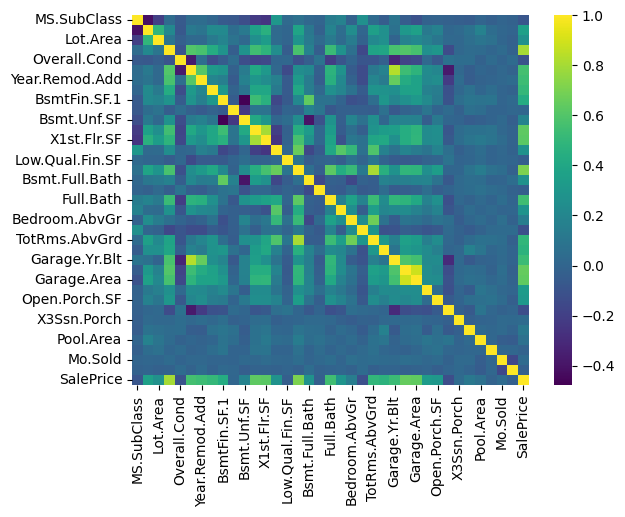

In [209]:
# APENAS PARA ANALISE
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='viridis')

/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/sit

<Axes: xlabel='Sale.Type', ylabel='SalePrice'>

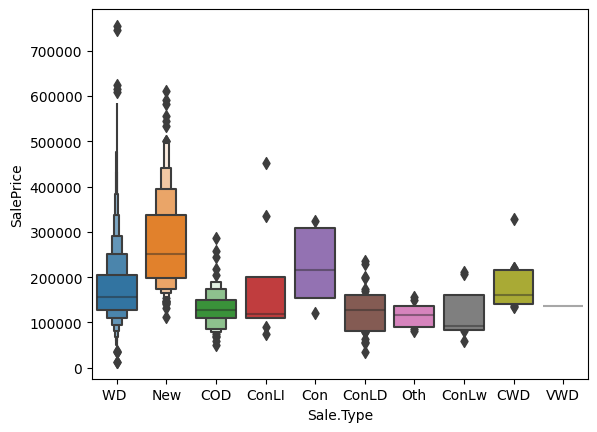

In [210]:
# APENAS PARA ANALISE

sns.violinplot(x='Sale.Type', y='SalePrice', data=df)

/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/sit

<Axes: xlabel='Year.Built', ylabel='SalePrice'>

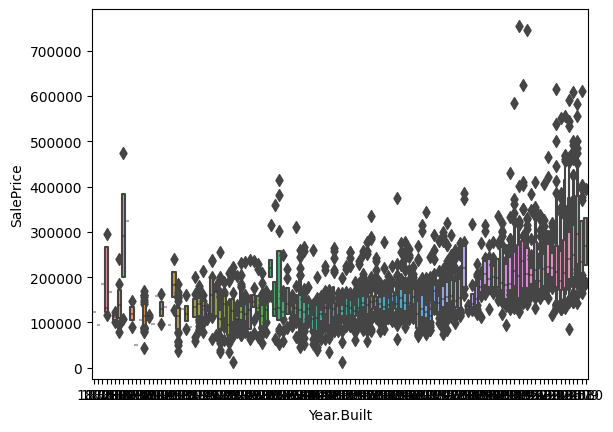

In [211]:
# APENAS PARA ANALISE

plt.figure(figsize=(15, 8))
sns.violinplot(x='Year.Built', y='SalePrice', data=df)

In [ ]:
# APENAS PARA ANALISE

sns.violinplot(x='Neighborhood', y='SalePrice', data=df)

In [212]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
y = np.log10(y)

In [213]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=ordinal_variables)
X = encoder.fit_transform(X)

encoder = ce.HashingEncoder(cols=categorical_variables, n_components=64)
X = encoder.fit_transform(X)

/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/home/thomaschiari/dev/insper/4sem/ml/Machine-Learning-Ames/env

In [214]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

In [215]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [216]:
'''from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X = pca.fit_transform(X)'''

'from sklearn.decomposition import PCA\n\npca = PCA(n_components=0.95)\nX = pca.fit_transform(X)'

In [217]:
# APENAS PARA ANALISE

X.shape

(2930, 120)

In [218]:
PROCESSED_PATH = DATA_DIR / 'processed_data.pkl'

with open(PROCESSED_PATH, 'wb') as file:
    pickle.dump((X, y), file)